# Unsupervised Analysis of Days of Week

Treating crossings each day as freatures to learn about the relationships between carious days.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get Data

In [2]:
from jupyterworkflow.data import get_fremont_data
data = get_fremont_data()

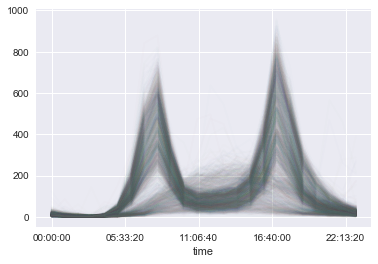

In [3]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

## Principal Component Analysis

In [4]:
X = pivoted.fillna(0).T.values
X.shape

(2189, 24)

In [5]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(2189, 2)

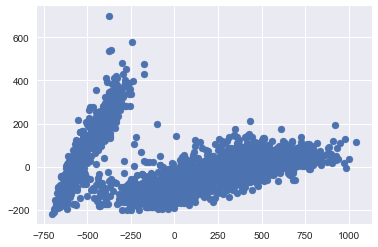

In [6]:
plt.scatter(X2[:, 0], X2[:, 1])

## Unsupervised Clustering

In [7]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

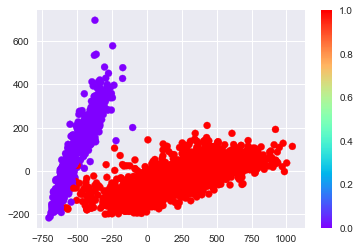

In [8]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

Text(0.5,1,'Red Cluster')

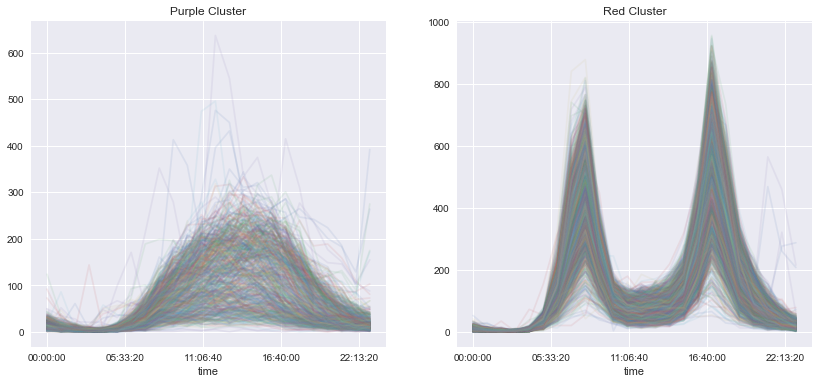

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0])
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1])

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster')

## Comparing with Day of Week

In [10]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

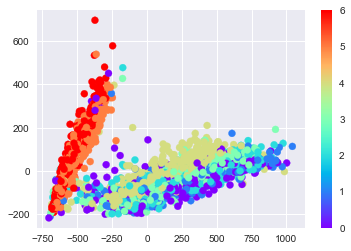

In [11]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

## Analyzing Outliers

The following points are weekdays with a holiday-like pattern

In [12]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20',
               '2018-09-21', '2018-09-24', '2018-09-25', '2018-09-26',
               '2018-09-27', '2018-09-28'],
              dtype='datetime64[ns]', length=1511, freq=None)

What's up with Feb 6, 2017? [Snow Storm](https://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/)

In [13]:
Updated

NameError: name 'Updated' is not defined